In [1757]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

###### IMPORTING THE DATA

In [1758]:
df= pd.read_csv('D:\YOU TUBE PROJECTS\Bengaluru_House_Data.csv')
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [1759]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [1760]:
df.drop("bath",axis=1)

,area_type,availability,location,size,society,total_sqft,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,1.0,51.00
...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,1.0,488.00


In [1761]:
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [1762]:

df['bhk'] = df['size'].apply(lambda x: int(str(x).split()[0]) if isinstance(x, str) else x)


In [1763]:
df[df['bhk']>20]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,bhk
1718,Super built-up Area,Ready To Move,2Electronic City Phase II,27 BHK,NaN,8000,27.0,0.0,230.0,27.0
4684,Plot Area,Ready To Move,Munnekollal,43 Bedroom,NaN,2400,40.0,0.0,660.0,43.0


In [1764]:
df["bhk"].unique()

array([ 2.,  4.,  3.,  6.,  1.,  8.,  7.,  5., 11.,  9., nan, 27., 10.,
       19., 16., 43., 14., 12., 13., 18.])

In [1765]:
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,bhk
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07,2.0
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00,4.0
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00,3.0
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00,3.0
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00,2.0
...,...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00,5.0
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00,4.0
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00,2.0
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00,4.0


In [1766]:
df.shape

(13320, 10)

In [1767]:
df.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price', 'bhk'],
      dtype='object')

In [1768]:
df.drop(['area_type','availability','society','balcony'],axis=1,inplace=True)

###### Dropping the Null values 

In [1769]:
df=df.dropna()

In [1770]:
df

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2.0
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4.0
2,Uttarahalli,3 BHK,1440,2.0,62.00,3.0
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3.0
4,Kothanur,2 BHK,1200,2.0,51.00,2.0
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00,5.0
13316,Richards Town,4 BHK,3600,5.0,400.00,4.0
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00,2.0
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00,4.0


In [1771]:
df.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
bhk           0
dtype: int64

In [1772]:
df

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2.0
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4.0
2,Uttarahalli,3 BHK,1440,2.0,62.00,3.0
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3.0
4,Kothanur,2 BHK,1200,2.0,51.00,2.0
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00,5.0
13316,Richards Town,4 BHK,3600,5.0,400.00,4.0
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00,2.0
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00,4.0


###### Exploratary Data Analysis

###### 1.Exploring the Size coloumn

In [1773]:
df["size"].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

###### 2.Exploring the Total_sqft coloumn

In [1774]:
df["total_sqft"].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [1775]:
#utility function
#This code defines a function `is_float(x)` that checks if a value `x` can be converted into a decimal number.
#if it can be converted, it returns "True," indicating it's a valid decimal number; otherwise, it returns "False," indicating it's not a valid decimal number.

In [1776]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [1777]:
df[~df["total_sqft"].apply(is_float)].head()

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4.0
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4.0
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2.0
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2.0
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2.0


In [1778]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [1779]:
df["total_sqft"] = df["total_sqft"].astype(str)
df["total_sqft"] = df["total_sqft"].apply(convert_sqft_to_num)
df= df[df.total_sqft.notnull()]



In [1780]:
df.loc[165]

location      Sarjapur
size             2 BHK
total_sqft      1242.5
bath               2.0
price            43.49
bhk                2.0
Name: 165, dtype: object

In [1781]:

df.loc[124]


location      Devanahalli
size                3 BHK
total_sqft         1282.0
bath                  2.0
price               68.52
bhk                   3.0
Name: 124, dtype: object

In [1782]:
df["total_sqft"].unique()

array([1056. , 2600. , 1440. , ..., 1258.5,  774. , 4689. ])

In [1783]:
df.sample(20)

,location,size,total_sqft,bath,price,bhk
2248,Kanakpura Road,3 BHK,1592.0,3.0,125.00,3.0
9079,Marathahalli,2 BHK,1350.0,2.0,99.00,2.0
10504,CV Raman Nagar,1 BHK,705.0,2.0,50.00,1.0
1623,Kengeri,2 BHK,1200.0,2.0,58.00,2.0
251,Anand Nagar,2 BHK,1060.0,2.0,55.00,2.0
4877,Mathikere,3 BHK,1590.0,3.0,120.00,3.0
12204,Kaggadasapura,3 BHK,1500.0,2.0,60.00,3.0
5128,Harlur,3 BHK,1750.0,3.0,136.00,3.0
6401,Ananth Nagar,4 Bedroom,1200.0,3.0,87.00,4.0
6960,Raja Rajeshwari Nagar,3 BHK,1375.0,2.0,54.99,3.0


###### 3.Adding New Column Price_per_sqft

In [1784]:
 #"price_per_sqft," which represents how much you're paying for each square foot of space in each property.
price_per_sqft = df["price"] * 100000 / df["total_sqft"]
df["Price_per_sqft"] = price_per_sqft

In [1785]:
df.sample(12)

,location,size,total_sqft,bath,price,bhk,Price_per_sqft
688,Kaggadasapura,3 BHK,1515.0,3.0,83.30,3.0,5498.349835
9327,Jeevan bima nagar,2 Bedroom,984.0,2.0,125.00,2.0,12703.252033
13304,Raja Rajeshwari Nagar,2 BHK,1187.0,2.0,40.14,2.0,3381.634372
13134,"Thanisandra Main Road,",4 BHK,2872.0,4.0,183.00,4.0,6371.866295
8931,Whitefield,3 BHK,2025.0,4.0,115.00,3.0,5679.012346
4336,Whitefield,2 BHK,1105.0,2.0,41.36,2.0,3742.986425
8471,Uttarahalli,2 BHK,1025.0,2.0,35.88,2.0,3500.487805
6755,Chandapura,2 BHK,975.0,2.0,24.86,2.0,2549.743590
7438,Seetharampalya,3 BHK,1350.0,3.0,68.00,3.0,5037.037037
10012,Prakash Nagar,2 BHK,800.0,2.0,55.00,2.0,6875.000000


In [1786]:
df["Price_per_sqft"].describe()

count    1.320000e+04
mean     7.920759e+03
std      1.067272e+05
min      2.678298e+02
25%      4.267701e+03
50%      5.438331e+03
75%      7.317073e+03
max      1.200000e+07
Name: Price_per_sqft, dtype: float64

In [1787]:
df

,location,size,total_sqft,bath,price,bhk,Price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2.0,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4.0,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3.0,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3.0,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2.0,4250.000000
...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5.0,6689.834926
13316,Richards Town,4 BHK,3600.0,5.0,400.00,4.0,11111.111111
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2.0,5258.545136
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4.0,10407.336319


###### 4."Location Data Cleaning and Dimensionality Reduction."

In [1788]:
#This code cleans up the 'Location' values by removing extra spaces
#then counts the frequency of each 'Location' value in the DataFrame 'df'.
# Check if the value is a non-null string before applying strip()
df['location'] = df['location'].apply(lambda x: x.strip() if isinstance(x, str) else x)

# Calculate location statistics
Location_stats = df['location'].value_counts(ascending=False)

In [1789]:
len(Location_stats)

1287

In [1790]:
Location_stats.sum()

13200

In [1791]:
#There are 1287 locations where Location_stats are lesser and equal to 10, so in next step this 1057 locations will be named as "Other"
len(Location_stats[Location_stats < 10])

1033

###### 4.1 Naming those 1057 Locations as "Others"

In [1792]:
location_less_than_10 = Location_stats[Location_stats < 10]

location_less_than_10

2nd Phase JP Nagar           9
Chandra Layout               9
Mathikere                    9
Kaverappa Layout             9
Peenya                       9
                            ..
Rajanna Layout               1
Subramanyanagar              1
Lakshmipura Vidyaanyapura    1
Malur Hosur Road             1
Abshot Layout                1
Name: location, Length: 1033, dtype: int64

In [1793]:
len(df['location'].unique())

1287

In [1794]:
df["location"] = df["location"].apply(lambda x: "Others" if x in Location_stats_less_than_10 else x)


In [1795]:
len(df['location'].unique())

241

In [1796]:
df.sample(10)

,location,size,total_sqft,bath,price,bhk,Price_per_sqft
1494,Kalena Agrahara,3 BHK,1765.0,3.0,125.00,3.0,7082.152975
2005,Haralur Road,2 BHK,1455.0,2.0,145.00,2.0,9965.635739
4428,BEML Layout,3 BHK,2000.0,2.0,85.00,3.0,4250.000000
4727,Others,3 BHK,1450.0,3.0,68.00,3.0,4689.655172
12249,Hennur Road,3 BHK,1891.0,3.0,110.00,3.0,5817.028027
11549,Thanisandra,4 BHK,2695.0,4.0,188.00,4.0,6975.881262
2762,HAL 2nd Stage,2 BHK,1226.0,3.0,135.00,2.0,11011.419250
13073,Nagarbhavi,4 Bedroom,600.0,3.0,100.00,4.0,16666.666667
11159,Old Madras Road,2 BHK,1157.0,2.0,47.32,2.0,4089.887640
11265,Benson Town,3 BHK,1805.0,3.0,280.00,3.0,15512.465374


In [1797]:
df.head()

,location,size,total_sqft,bath,price,bhk,Price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2.0,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4.0,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3.0,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3.0,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2.0,4250.000000


###### Removing OUTLIERS

###### 1.Removing OUTLIERS Using Business Logic


###### When engaging in discussions with your business manager, who possesses extensive knowledge in the real estate domain, it's common to hear that the standard practice is to allocate 300 square feet per bedroom.In other words, a 2-bedroom apartment should ideally have a minimum area of 600 square feet.Any 2-bedroom apartment with an area as low as 400 square feet, for instance, would raise suspicion and might warrant exclusion as an outlier. Consequently, we will implement an outlier removal process by establishing a minimum threshold of 300 square feet per bedroom.

In [1798]:
df.head()

,location,size,total_sqft,bath,price,bhk,Price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2.0,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4.0,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3.0,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3.0,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2.0,4250.000000


In [1799]:
df[df['total_sqft']/df['bhk']<300].head()

,location,size,total_sqft,bath,price,bhk,Price_per_sqft
9,Others,6 Bedroom,1020.0,6.0,370.0,6.0,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8.0,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6.0,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8.0,6296.296296
70,Others,3 Bedroom,500.0,3.0,100.0,3.0,20000.000000


In [1800]:
df= df[~(df['total_sqft']/df['bhk']<300)]
df.shape

(12456, 7)

###### 2.Removing OUTLIERS for "Price_per_sqft"

In [1801]:
df.Price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: Price_per_sqft, dtype: float64

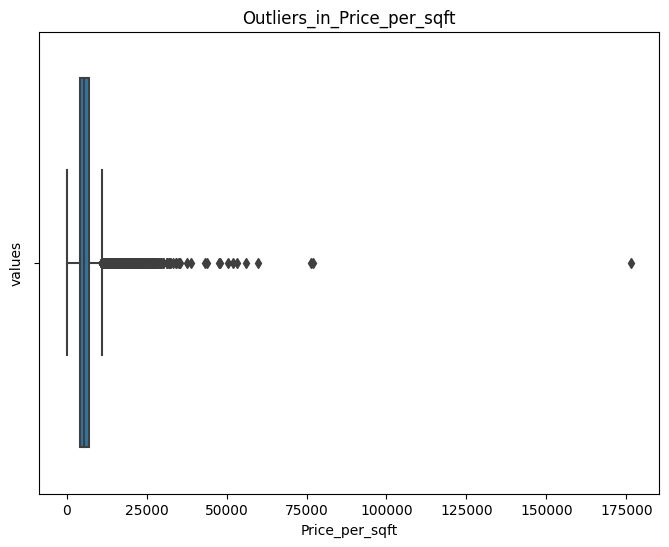

In [1802]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df,x="Price_per_sqft")
plt.xlabel("Price_per_sqft")
plt.ylabel("values")
plt.title("Outliers_in_Price_per_sqft")
plt.show()

In [1803]:
df.head()

,location,size,total_sqft,bath,price,bhk,Price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2.0,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4.0,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3.0,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3.0,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2.0,4250.000000


In [1804]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key,i in df.groupby('location'):
         m = np.mean(i.Price_per_sqft)
         sd = np.std(i.Price_per_sqft)
         reduce_df = i[((i.Price_per_sqft > (m-sd)) & (i.Price_per_sqft < (m+sd)))]
         df_out = pd.concat([df_out,reduce_df], ignore_index = True)
    return df_out

In [1805]:
df= remove_pps_outliers(df)
df.Price_per_sqft.describe()

count    10242.000000
mean      5657.735993
std       2266.368844
min       1250.000000
25%       4244.796706
50%       5172.846776
75%       6426.000592
max      24509.803922
Name: Price_per_sqft, dtype: float64

In [1806]:
df.shape

(10242, 7)

###### 2.Removing OUTLIERS from BHK

In [1807]:
import matplotlib
def scatter_plot(df,location):
    bhk2 = df[(df.location == location) & (df.bhk == 2)]
    bhk3 = df[(df.location == location) & (df.bhk == 3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft , bhk2.price, color = 'green', label = '2BHK', s= 50)
    plt.scatter(bhk3.total_sqft, bhk3.price, color = 'blue', marker = '*', label = '3BHK', s = 50)
    plt.xlabel('Total Sqft Area')
    plt.ylabel("Price(in Lakh Rupees)")
    plt.title(location)
    plt.legend()
    plt.show()

In [1808]:
df.location.unique()

array(['1st Block Jayanagar', '1st Phase JP Nagar',
       '2nd Phase Judicial Layout', '2nd Stage Nagarbhavi',
       '5th Block Hbr Layout', '5th Phase JP Nagar', '6th Phase JP Nagar',
       '7th Phase JP Nagar', '8th Phase JP Nagar', '9th Phase JP Nagar',
       'AECS Layout', 'Abbigere', 'Akshaya Nagar', 'Ambalipura',
       'Ambedkar Nagar', 'Amruthahalli', 'Anandapura', 'Ananth Nagar',
       'Anekal', 'Anjanapura', 'Ardendale', 'Arekere', 'Attibele',
       'BEML Layout', 'BTM 2nd Stage', 'BTM Layout', 'Babusapalaya',
       'Badavala Nagar', 'Balagere', 'Banashankari',
       'Banashankari Stage II', 'Banashankari Stage III',
       'Banashankari Stage V', 'Banashankari Stage VI', 'Banaswadi',
       'Banjara Layout', 'Bannerghatta', 'Bannerghatta Road',
       'Basavangudi', 'Basaveshwara Nagar', 'Battarahalli', 'Begur',
       'Begur Road', 'Bellandur', 'Benson Town', 'Bharathi Nagar',
       'Bhoganhalli', 'Billekahalli', 'Binny Pete', 'Bisuvanahalli',
       'Bommanahalli'

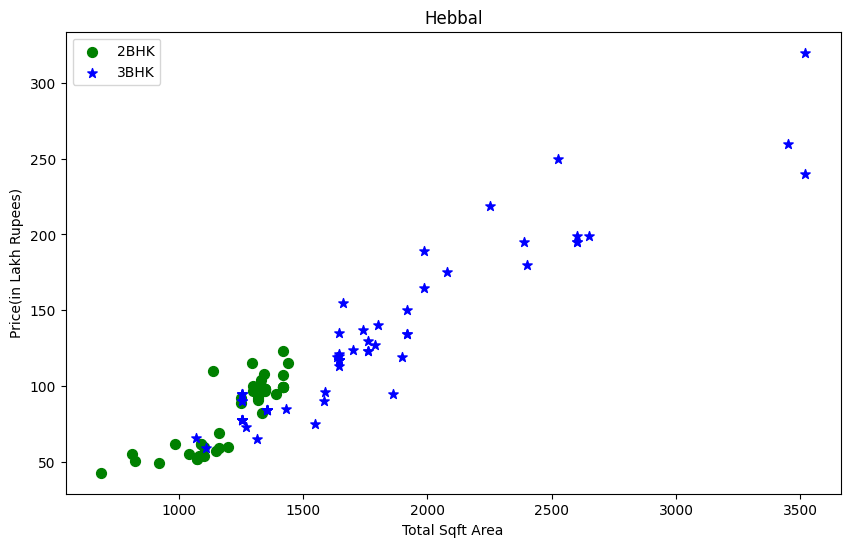

In [1809]:
plt.figure(figsize=(10,6))
scatter_plot(df,'Hebbal')

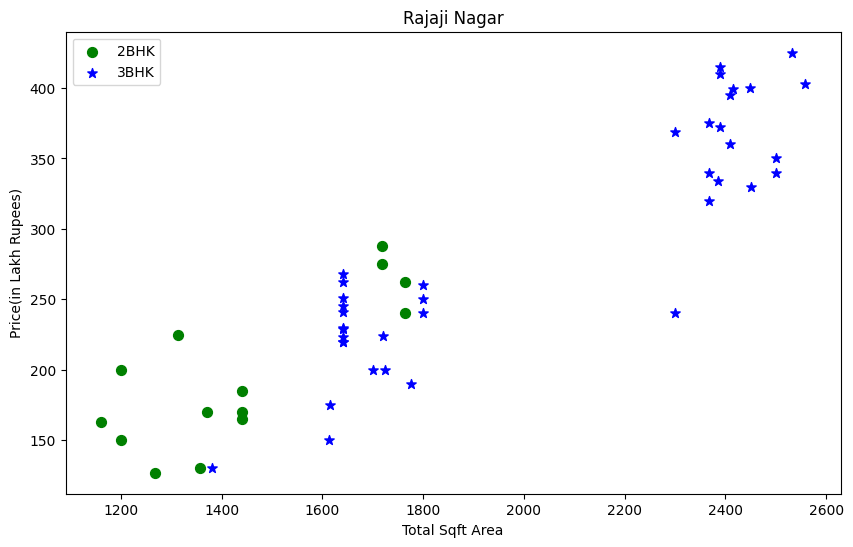

In [1810]:
plt.figure(figsize=(10,6))
scatter_plot(df,'Rajaji Nagar')

In [1811]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.Price_per_sqft),
                'std': np.std(bhk_df.Price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.Price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')

In [1812]:
df= remove_bhk_outliers(df)
df.shape

(7317, 7)

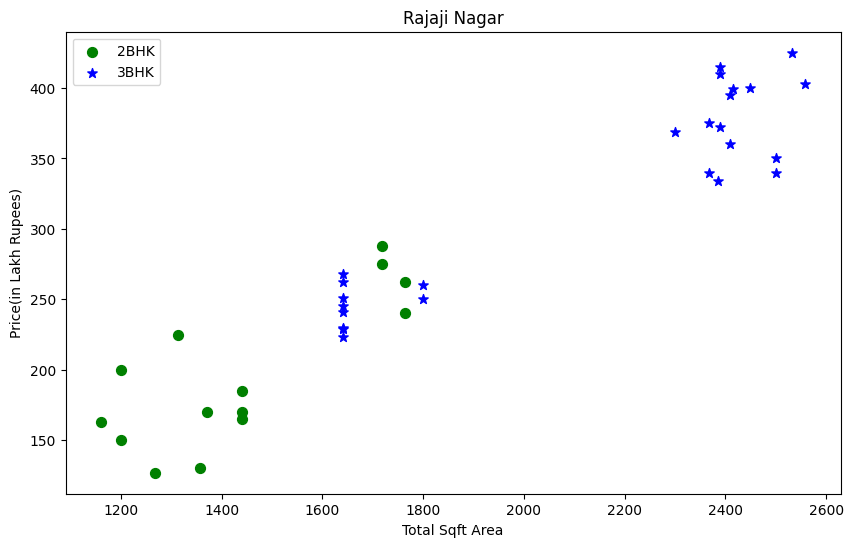

In [1813]:
plt.figure(figsize=(10,6))
scatter_plot(df,'Rajaji Nagar')

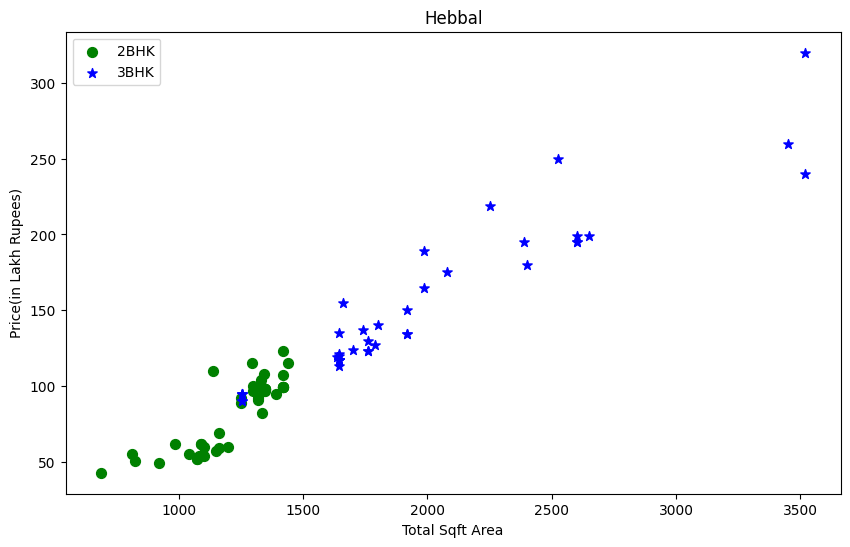

In [1814]:
plt.figure(figsize=(10,6))
scatter_plot(df,'Hebbal')

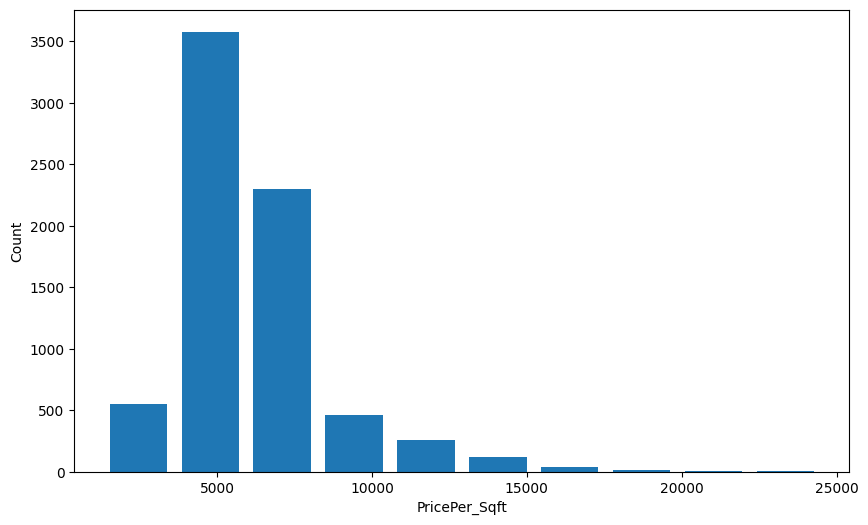

In [1815]:
plt.figure(figsize=(10,6))
plt.hist(df['Price_per_sqft'], rwidth = 0.8)
plt.xlabel('PricePer_Sqft')
plt.ylabel('Count')
plt.show()

###### 3.Outlier Removal Using Bathrooms Feature

In [1816]:
df.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [1817]:
df[df['bath']>10]

,location,size,total_sqft,bath,price,bhk,Price_per_sqft
5277,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10.0,4000.000000
5926,Others,10 BHK,12000.0,12.0,525.0,10.0,4375.000000
6015,Others,16 BHK,10000.0,16.0,550.0,16.0,5500.000000
6749,Others,11 BHK,6000.0,12.0,150.0,11.0,2500.000000
7080,Others,13 BHK,5425.0,13.0,275.0,13.0,5069.124424


In [1818]:
df[df['bath'] > df['bhk']+2]

,location,size,total_sqft,bath,price,bhk,Price_per_sqft
1626,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4.0,3252.032520
5238,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4.0,6428.571429
5851,Others,6 BHK,11338.0,9.0,1000.0,6.0,8819.897689
9017,Thanisandra,3 BHK,1806.0,6.0,116.0,3.0,6423.034330


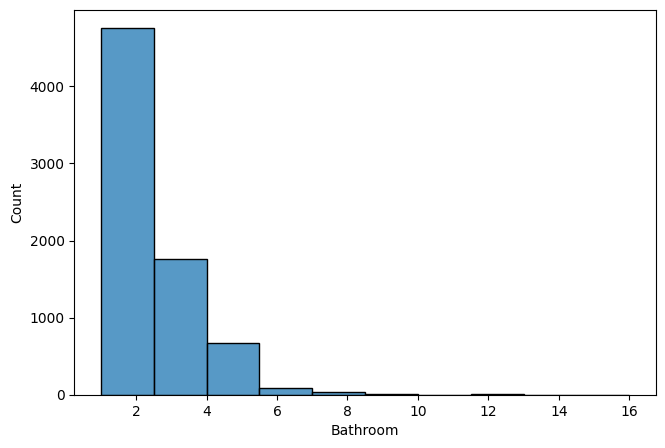

In [1819]:
plt.figure(figsize=(7.5, 5))
sns.histplot(df["bath"],bins=10)
plt.xlabel("Bathroom")
plt.ylabel("Count")
plt.show()

In [1820]:
df[df["bath"]>10]

,location,size,total_sqft,bath,price,bhk,Price_per_sqft
5277,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10.0,4000.000000
5926,Others,10 BHK,12000.0,12.0,525.0,10.0,4375.000000
6015,Others,16 BHK,10000.0,16.0,550.0,16.0,5500.000000
6749,Others,11 BHK,6000.0,12.0,150.0,11.0,2500.000000
7080,Others,13 BHK,5425.0,13.0,275.0,13.0,5069.124424


In [1821]:
df[df.bath>df.bhk+2]


,location,size,total_sqft,bath,price,bhk,Price_per_sqft
1626,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4.0,3252.032520
5238,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4.0,6428.571429
5851,Others,6 BHK,11338.0,9.0,1000.0,6.0,8819.897689
9017,Thanisandra,3 BHK,1806.0,6.0,116.0,3.0,6423.034330


In [1822]:
df.shape

(7317, 7)

###### The business manager discusses with you, a data scientist, stating that in the case of a 4-bedroom home, even with a bathroom in each of the four rooms and an additional guest bathroom, the maximum number of bathrooms should equal the total number of bedrooms plus one. Anything exceeding this threshold is considered an outlier or a data error and can be excluded.

In [1823]:
df=df[df.bath<df.bhk+2]
df.shape

(7239, 7)

In [1824]:
df[df["bath"]>10]

,location,size,total_sqft,bath,price,bhk,Price_per_sqft
6015,Others,16 BHK,10000.0,16.0,550.0,16.0,5500.000000
6749,Others,11 BHK,6000.0,12.0,150.0,11.0,2500.000000
7080,Others,13 BHK,5425.0,13.0,275.0,13.0,5069.124424


In [1825]:
df=df.drop(["size","Price_per_sqft"],axis=1)

In [1826]:
df.sample(3)

,location,total_sqft,bath,price,bhk
2135,Electronic City,1060.0,2.0,55.0,2.0
5166,Mysore Road,1003.0,2.0,43.0,2.0
4733,Kundalahalli,1030.0,2.0,49.0,2.0


###### Frequency Encoding for converting categorical values to Numerical values in Location Column

In [1827]:
df["location"].nunique()

241

In [1828]:
df.location

0        1st Block Jayanagar
1        1st Block Jayanagar
2        1st Block Jayanagar
3        1st Block Jayanagar
4        1st Block Jayanagar
                ...         
10231           Yeshwanthpur
10232           Yeshwanthpur
10234           Yeshwanthpur
10239           Yeshwanthpur
10240           Yeshwanthpur
Name: location, Length: 7239, dtype: object

In [1829]:
dummies = pd.get_dummies(df.location)


In [1830]:
df= pd.concat([df,dummies.drop('Others',axis='columns')],axis='columns')
df.head()

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,130.0,3.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,148.0,2.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [1831]:
df= df.drop('location',axis='columns')
df.head(2)

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


###### Build a Model Now

In [1832]:
df.shape

(7239, 244)

In [1833]:
X = df.drop(['price'],axis='columns')
X.head(3)


,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [1834]:
X.shape

(7239, 243)

In [1835]:
y = df.price
y.head(3)

0    428.0
1    194.0
2    235.0
Name: price, dtype: float64

In [1836]:
len(y)


7239

In [1837]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [1838]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [1839]:
from sklearn.metrics import r2_score
y_pred = lr.predict(X_test)
print(lr.score(X_test,y_test))

0.8521345963177515


In [1840]:
from sklearn.model_selection import ShuffleSplit, cross_val_score

###### Use K Fold cross validation to measure accuracy of our LinearRegression model

In [1841]:
cv = ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.85828778, 0.84336113, 0.79796392, 0.83935442, 0.87210932])

###### Find best model using GridSearchCV


In [1842]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
            }
        },
        'random_forest':{
            'model': RandomForestRegressor(),
            'params':{}
        
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score'])

find_best_model_using_gridsearchcv(X,y)

,model,best_score
0,linear_regression,0.842215
1,random_forest,0.761389
2,lasso,0.709787
3,decision_tree,0.708856


In [1843]:
price_data = pd.DataFrame({'Actual Price': y_test, 'Predicted Price':lr.predict(X_test)})
price_data.head(10)

,Actual Price,Predicted Price
4160,41.0,25.865714
1413,57.0,57.026309
7727,70.0,72.641132
8053,400.0,331.582436
2918,155.0,126.408062
4691,52.0,16.377025
215,35.0,40.947350
357,80.0,78.116814
8855,135.0,118.253981
4884,69.0,88.723089


In [1844]:
def predict_price(location, sqft, bath, bhk, area_type):    
    loc_index = np.where(X.columns == location)[0][0] if location in X.columns else -1
    area_index = np.where(X.columns == area_type)[0][0] if area_type in X.columns else -1

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1
    if area_index >= 0:
        x[area_index] = 1

    return lr.predict([x])[0]

In [1845]:
predict_price('1st Phase JP Nagar', 1000, 2, 2, 'Plot  Area')

87.03132951088975

In [1846]:
predict_price('1st Phase JP Nagar',1000, 3, 3,'Plot  Area')

90.02333712650038

In [1847]:
predict_price('Indira Nagar',1000, 2, 2,'Plot  Area')

176.31443800507054